<a href="https://colab.research.google.com/github/ALONSO93MARTINEZ/Proyect-Pipeline/blob/main/Lopez_Omar_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [122]:
# 1. Carga de Datos
def cargar_datos_estudiante(ruta_archivo='student-mat.csv'):
    print(f"Cargando datos desde '{ruta_archivo}'...")
    df = pd.read_csv(ruta_archivo, sep=';', quotechar='"')
    print("Primeras 5 filas:")
    display(df.head())
    return df

# 2. Selección de Características y Variable Objetivo & Preprocesamiento Básico (Manejo de valores nulos - ejemplo)
def preparar_caracteristicas_objetivo(df):
    columna_objetivo = 'G3'
    caracteristicas = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
                       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


    X = df[caracteristicas]
    y = df[columna_objetivo]

    print("\nVerificando valores nulos:")
    print(X.isnull().sum().sum())
    print(y.isnull().sum())

    print("\nCaracterísticas Seleccionadas:")
    display(X.head())
    print("\nVariable Objetivo (G3):")
    display(y.head())

    return X, y

# 3. Preprocesamiento
def preprocesar_datos(X):
    columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns
    columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns

    preprocesador = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columnas_numericas),
            ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
        ],
        remainder='passthrough'
    )

    print("\nAplicando preprocesamiento (Escalando numéricas, Codificando categóricas)...")
    X_procesado = preprocesador.fit_transform(X)
    nombres_caracteristicas = preprocesador.get_feature_names_out(X.columns)

    print("Forma de características originales:", X.shape)
    print("Forma de características procesadas:", X_procesado.shape)

    return X_procesado, nombres_caracteristicas

# 4. División de Datos
def dividir_datos(X_procesado, y, tamano_prueba=0.2, estado_aleatorio=42):
    print(f"\nDividiendo datos en conjuntos de entrenamiento y prueba ({tamano_prueba*100}% tamaño de prueba)...")
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X_procesado, y, test_size=tamano_prueba, random_state=estado_aleatorio
    )

    print("Forma de X_entrenamiento:", X_entrenamiento.shape)
    print("Forma de X_prueba:", X_prueba.shape)
    print("Forma de y_entrenamiento:", y_entrenamiento.shape)
    print("Forma de y_prueba:", y_prueba.shape)

    return X_entrenamiento, X_prueba, y_entrenamiento, y_prueba

# 5. Construcción y Entrenamiento del Modelo (Regresión Lineal)
def construir_entrenar_modelo(X_entrenamiento, y_entrenamiento):
    print("\nConstruyendo y entrenando modelo de Regresión Lineal...")
    modelo = LinearRegression()
    modelo.fit(X_entrenamiento, y_entrenamiento)
    print("Entrenamiento del modelo completado.")
    return modelo

# 6. Evaluación del Modelo
def evaluar_modelo(modelo, X_prueba, y_prueba):
    print("\nEvaluando rendimiento del modelo...")
    predicciones = modelo.predict(X_prueba)

    # Calcular métricas de regresión
    r2 = r2_score(y_prueba, predicciones)
    mae = mean_absolute_error(y_prueba, predicciones)
    rmse = np.sqrt(mean_squared_error(y_prueba, predicciones))

    print(f"Coeficiente de Determinación (R²): {r2:.4f}")
    print(f"Error Absoluto Medio (MAE): {mae:.4f}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

    return predicciones, r2, mae, rmse

# 7. Análisis de Importancia de Variables (Coeficientes)
def analizar_importancia_variables(modelo, nombres_caracteristicas):
    print("\nAnalizando Importancia de Variables (Coeficientes del Modelo):")
    coeficientes = modelo.coef_

    if len(coeficientes) == len(nombres_caracteristicas):
        importancia_caracteristicas = pd.Series(coeficientes, index=nombres_caracteristicas)
        display(importancia_caracteristicas.sort_values(ascending=False))
    else:
        print("Advertencia: El número de coeficientes no coincide con el número de nombres de características.")
        display(coeficientes)

# 8. Visualización de Resultados (Real vs. Predicho)
def visualizar_resultados(y_prueba, predicciones):
    print("\nVisualizando Notas G3 Reales vs. Predichas:")
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    plt.scatter(predicciones, y_prueba, alpha=0.5)
    plt.xlabel("G3 Predicha")
    plt.ylabel("G3 Real")
    plt.title("Notas G3 Reales vs. Predichas del Estudiante")

    max_val = max(y_prueba.max(), predicciones.max())
    min_val = min(y_prueba.min(), predicciones.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
    plt.grid(True)
    plt.show()

In [123]:
def pipeline():
    df = cargar_datos_estudiante()
    X, y = preparar_caracteristicas_objetivo(df)
    X_procesado, nombres_caracteristicas = preprocesar_datos(X)
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = dividir_datos(X_procesado, y)
    modelo = construir_entrenar_modelo(X_entrenamiento, y_entrenamiento)
    predicciones, r2, mae, rmse = evaluar_modelo(modelo, X_prueba, y_prueba)
    analizar_importancia_variables(modelo, nombres_caracteristicas)
    visualizar_resultados(y_prueba, predicciones)

    print("\nEjecución del pipeline finalizada.")
    return modelo, X_prueba, y_prueba, predicciones, r2, mae, rmse, nombres_caracteristicas

Cargando datos desde 'student-mat.csv'...
Primeras 5 filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Verificando valores nulos:
0
0

Características Seleccionadas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4



Variable Objetivo (G3):


,G3
0,6
1,6
2,10
3,15
4,10



Aplicando preprocesamiento (Escalando numéricas, Codificando categóricas)...
Forma de características originales: (395, 30)
Forma de características procesadas: (395, 56)

Dividiendo datos en conjuntos de entrenamiento y prueba (20.0% tamaño de prueba)...
Forma de X_entrenamiento: (316, 56)
Forma de X_prueba: (79, 56)
Forma de y_entrenamiento: (316,)
Forma de y_prueba: (79,)

Construyendo y entrenando modelo de Regresión Lineal...
Entrenamiento del modelo completado.

Evaluando rendimiento del modelo...
Coeficiente de Determinación (R²): 0.1415
Error Absoluto Medio (MAE): 3.3953
Raíz del Error Cuadrático Medio (RMSE): 4.1957

Analizando Importancia de Variables (Coeficientes del Modelo):


,0
cat__Mjob_health,1.038329
cat__Fjob_teacher,0.891945
cat__higher_yes,0.875440
cat__sex_M,0.747955
num__studytime,0.635039
cat__famsup_no,0.628216
cat__Mjob_services,0.589838
cat__guardian_other,0.564322
num__absences,0.530022
num__Medu,0.510611



Visualizando Notas G3 Reales vs. Predichas:


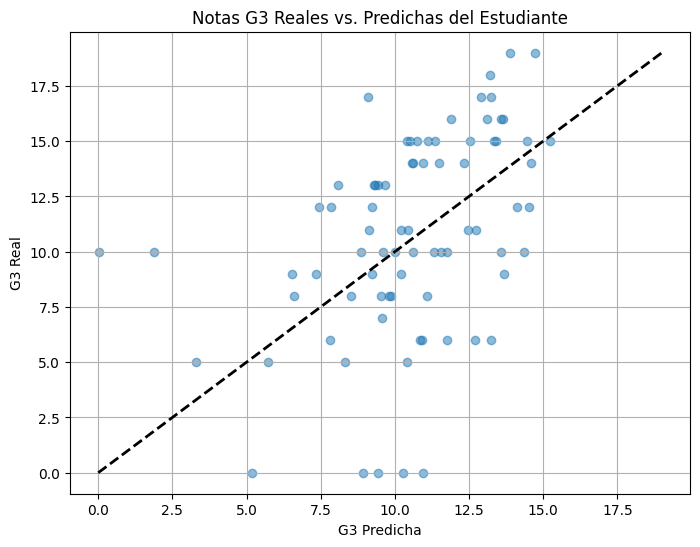


Ejecución del pipeline finalizada.


(LinearRegression(),
 array([[ 0.23837976, -0.68538721, -1.39997047, ...,  1.        ,
          1.        ,  0.        ],
        [ 1.02304645, -1.60000865, -0.47985677, ...,  1.        ,
          0.        ,  1.        ],
        [ 1.02304645,  0.22923423,  0.44025694, ...,  1.        ,
          0.        ,  1.        ],
        ...,
        [-1.33095364, -0.68538721, -1.39997047, ...,  1.        ,
          0.        ,  1.        ],
        [-1.33095364,  1.14385567, -0.47985677, ...,  1.        ,
          0.        ,  1.        ],
        [ 0.23837976,  0.22923423, -0.47985677, ...,  1.        ,
          1.        ,  0.        ]]),
 78     10
 371    12
 248     5
 55     10
 390     9
        ..
 364    12
 82      6
 114     9
 3      15
 18      5
 Name: G3, Length: 79, dtype: int64,
 array([ 1.88508025,  7.45339224,  8.30868805, 11.55112413, 10.20284528,
         9.43314825, 13.21126069, 12.69040139, 10.26673682, 12.34152834,
        12.54156595,  9.55022368, 11.1237184 , 1

In [125]:
pipeline()